In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')

## 리스트를 활용하여 DF 만들기 

In [3]:
# 리스트가 컬럼으로 들어갈 때 
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)
# from_items라는 함수가 있었으나 삭제되었다. 

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [4]:
# 리스트가 row로 들어갈 때 
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index', columns=['A', 'B', 'C', 'D'])

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


## 인덱싱

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# 두 가지 조건으로 인덱싱 
df.loc[(df["sepal_length"] > 5) | (df["petal_length"] > 5)]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
# 인덱스 번호로 sub 데이터 프레임 추출
df.iloc[[2,10, 147]]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica


In [24]:
# 특정 값으로 로우 검색한 후 값 입력하기 
cond = (df['sepal_length'] >= 6.0) & (df['sepal_width'] >= 3.0)
df.loc[cond, 'class'] = 'good'
df.loc[df['class'] == 'good']
df

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN
3,4.6,3.1,1.5,0.2,setosa,NaN
4,5.0,3.6,1.4,0.2,setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,good
146,6.3,2.5,5.0,1.9,virginica,NaN
147,6.5,3.0,5.2,2.0,virginica,good
148,6.2,3.4,5.4,2.3,virginica,good


In [17]:
# 결측치 채우기 1 (전체)
df['sepal_length'].fillna(0, inplace=True)

In [18]:
# 결측치 채우기 2 (특정 컬럼)
df.fillna(0, inplace=True)

In [19]:
# 결측치 제거하기 1
df.dropna(subset=['sepal_length'], inplace=True)

In [20]:
# 결측치 제거하기 2
df[df['sepal_length'].isnull() == True]

,sepal_length,sepal_width,petal_length,petal_width,species


In [30]:
# Dropping NaNs in a specific column in pandas
df.dropna(subset=["species"]) #inplace 가능

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN
3,4.6,3.1,1.5,0.2,setosa,NaN
4,5.0,3.6,1.4,0.2,setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,good
146,6.3,2.5,5.0,1.9,virginica,NaN
147,6.5,3.0,5.2,2.0,virginica,good
148,6.2,3.4,5.4,2.3,virginica,good


In [29]:
# groupby().first() 가 아닌 2개까지 보고 싶을 때
df.groupby(['species']).head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
50,7.0,3.2,4.7,1.4,versicolor,good
51,6.4,3.2,4.5,1.5,versicolor,good
100,6.3,3.3,6.0,2.5,virginica,good
101,5.8,2.7,5.1,1.9,virginica,NaN


## 컬럼 연산

In [ ]:
# 중복되는 컬럼 제거
df.loc[:, ~df.T.duplicated()]

In [12]:
# apply로 컬럼에 함수 적용
square = lambda x: x**2  # lambda를 통해 함수 바로 생성 가능
df['sepal_length'].apply(square)

0      26.01
1      24.01
2      22.09
3      21.16
4      25.00
       ...  
145    44.89
146    39.69
147    42.25
148    38.44
149    34.81
Name: sepal_length, Length: 150, dtype: float64

In [13]:
# 1줄 for문으로 적용하기 (list 형태 return만 가능)
[x**2 for x in df['sepal_length']]

[26.009999999999998,
 24.010000000000005,
 22.090000000000003,
 21.159999999999997,
 25.0,
 29.160000000000004,
 21.159999999999997,
 25.0,
 19.360000000000003,
 24.010000000000005,
 29.160000000000004,
 23.04,
 23.04,
 18.49,
 33.64,
 32.49,
 29.160000000000004,
 26.009999999999998,
 32.49,
 26.009999999999998,
 29.160000000000004,
 26.009999999999998,
 21.159999999999997,
 26.009999999999998,
 23.04,
 25.0,
 25.0,
 27.040000000000003,
 27.040000000000003,
 22.090000000000003,
 23.04,
 29.160000000000004,
 27.040000000000003,
 30.25,
 24.010000000000005,
 25.0,
 30.25,
 24.010000000000005,
 19.360000000000003,
 26.009999999999998,
 25.0,
 20.25,
 19.360000000000003,
 25.0,
 26.009999999999998,
 23.04,
 26.009999999999998,
 21.159999999999997,
 28.09,
 25.0,
 49.0,
 40.96000000000001,
 47.61000000000001,
 30.25,
 42.25,
 32.49,
 39.69,
 24.010000000000005,
 43.559999999999995,
 27.040000000000003,
 25.0,
 34.81,
 36.0,
 37.209999999999994,
 31.359999999999996,
 44.89,
 31.3599999999999

In [14]:
# map 함수로 컬럼에 모든 값에 함수 적용
df['sepal_length'].map(lambda x: x**2)

0      26.01
1      24.01
2      22.09
3      21.16
4      25.00
       ...  
145    44.89
146    39.69
147    42.25
148    38.44
149    34.81
Name: sepal_length, Length: 150, dtype: float64

In [16]:
# 컬럼 반올림 
df.round({'sepal_length': -1, 'sepal_width': 0, 'petal_length': 1})
#df[col].apply(np.floor)

,sepal_length,sepal_width,petal_length,petal_width,species
0,10.0,4.0,1.4,0.2,setosa
1,0.0,3.0,1.4,0.2,setosa
2,0.0,3.0,1.3,0.2,setosa
3,0.0,3.0,1.5,0.2,setosa
4,0.0,4.0,1.4,0.2,setosa
...,...,...,...,...,...
145,10.0,3.0,5.2,2.3,virginica
146,10.0,2.0,5.0,1.9,virginica
147,10.0,3.0,5.2,2.0,virginica
148,10.0,3.0,5.4,2.3,virginica


In [10]:
# ensemble best score 추출하기
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].max(axis=1)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64

In [25]:
# 컬럼 타입 변경 {float, int, str, }
df['petal_length'].dtype
df['petal_length'] = df['petal_length'].astype('str')

dtype('O')

In [26]:
# 두 문자열 컬럼 더하기 (같은 값이면 제거하면서)
# astype(str)이 컬럼을 스트링으로 변경해 줌
# set이 결려있어서 중복이면 하나만 가져옴
# .join 앞에 구분자를 적어두면 됨. 여기에서는 /

df[['sepal_width', 'petal_width']].apply(lambda x: '/'.join(set(x.astype(str))), axis=1)

0      3.5/0.2
1      3.0/0.2
2      3.2/0.2
3      3.1/0.2
4      3.6/0.2
        ...   
145    2.3/3.0
146    1.9/2.5
147    2.0/3.0
148    2.3/3.4
149    1.8/3.0
Length: 150, dtype: object

In [27]:
# 두 숫자 컬럼 더하기 (단순하게 덧셈)
df['sepal_width'] + df['sepal_width']

0      7.0
1      6.0
2      6.4
3      6.2
4      7.2
      ... 
145    6.0
146    5.0
147    6.0
148    6.8
149    6.0
Name: sepal_width, Length: 150, dtype: float64

In [28]:
# countif와 같은 방법 
df.groupby(['species'])['species'].transform('count')

0      50
1      50
2      50
3      50
4      50
       ..
145    50
146    50
147    50
148    50
149    50
Name: species, Length: 150, dtype: int64

In [ ]:
# 특정 컬럼 로그로 치환하기
import math
df["sepal_length"].apply(lambda x: round(-(math.log(x))+9, 1)) # nM인 경우 +9

In [ ]:
# apply 함수 적용하여 값에 따라 0,1 label하기 
df["sepal_length"].apply(lambda x: 1 if x>5 else 0)

## 반복문

In [ ]:
# iterrows(): 모든 컬럼의 값들을 순서대로 가지고 와서 활용하고자 할 때 
# zip(df.a, df.b)를 사용하지 않아도 됨
for i in df.iterrows():
    idx = i[0]
    sepal_length = i[1][1]
    print(idx, sepal_length)

## 그래프

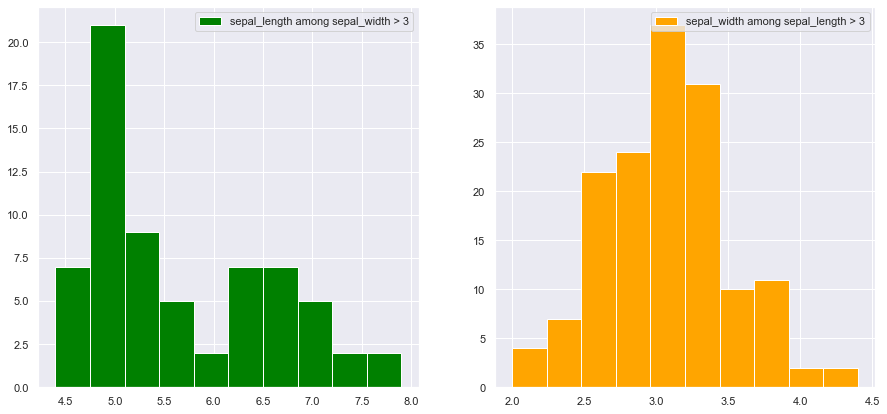

In [31]:
# Plotting grid of distributions with conditionals on columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

plt.figure(figsize=(15,7))
plt.subplot(1,2,1) # 가로 1줄, 컬럼 2줄, 첫번째 위치에 그림
df["sepal_length"][df["sepal_width"]>3].hist(color="green",label="sepal_length among sepal_width > 3")
plt.legend() # 레전드 안에 내용이 있으면 이 내용으로 출력하고 없으면 위의 label 내용을 그래프에 출력한다. 

plt.subplot(1,2,2) # 가로 1줄, 컬럼 2줄, 두번째 위치에 그림
df["sepal_width"][df["sepal_length"]>3].hist(color="orange",label="sepal_width among sepal_length > 3")
plt.legend()

plt.show()